In [ ]:
#Kolom import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

In [ ]:
#Load data
df = pd.read_csv('h8dsft_P1G2_didit eko.csv')
df.head(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K
2,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
3,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K
5,30,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,Portugal,<=50K
6,46,Self-emp-inc,9th,5,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,50,United-States,<=50K
7,28,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,<=50K
8,37,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States,<=50K
9,40,Local-gov,9th,5,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,Yugoslavia,>50K


In [ ]:
#duplicate dataset
df1 = df.copy()

In [ ]:
#cek dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29970 entries, 0 to 29969
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29970 non-null  int64 
 1   workclass       29970 non-null  object
 2   education       29970 non-null  object
 3   education_num   29970 non-null  int64 
 4   marital_status  29970 non-null  object
 5   occupation      29970 non-null  object
 6   relationship    29970 non-null  object
 7   race            29970 non-null  object
 8   sex             29970 non-null  object
 9   capital_gain    29970 non-null  int64 
 10  capital_loss    29970 non-null  int64 
 11  hours_per_week  29970 non-null  int64 
 12  native_country  29970 non-null  object
 13  income_bracket  29970 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


statement :
- jenis type data terdiri dari 9 string/ object , 5 integer
- bisa dilihat dari info data di atas ternyata tidak terdapat missing value

In [ ]:
#cekdatasset 2
df.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,29970.000000,29970.000000,29970.000000,29970.000000,29970.000000
mean,38.556490,10.146980,1126.626460,89.876410,41.025192
std,13.085772,2.564979,7582.072041,407.490462,12.002305
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


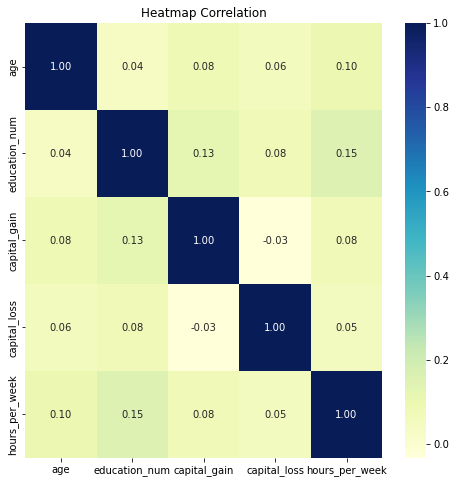

In [ ]:
# get correlation using Heatmap
plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap ="YlGnBu")
plt.title("Heatmap Correlation")
plt.show()

- melihat corelasi antar column yang memiliki hubungan satu sama lain

In [ ]:
#grup berdasarkan 'education','education_num'
df.groupby(['education','education_num'])[["income_bracket"]].count().sort_values(by='income_bracket', ascending=False) 

,,income_bracket
education,education_num,
HS-grad,9,9602
Some-college,10,6591
Bachelors,13,5097
Masters,14,1665
Assoc-voc,11,1297
11th,7,1057
Assoc-acdm,12,1009
10th,6,833
Prof-school,15,554


C:\Users\didit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'count')

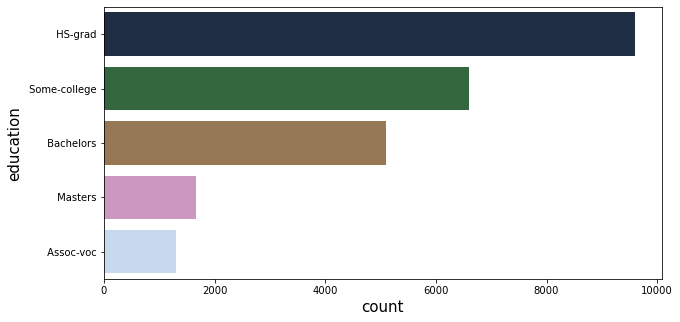

In [ ]:
edu = df.education.value_counts()[:5]
plt.figure(figsize=(10, 5))
sns.barplot(edu, edu.index, palette = "cubehelix")
plt.ylabel('education', fontsize=15)
plt.xlabel('count', fontsize=15)

- dapat dilihat bahwa education itu mempengaruhi income, semakin tinggi jenjang pendidikan kemungkinan mendapat income tinggi semakin besar

In [ ]:
#groupby income bracket
income = df.groupby(["income_bracket"])[["income_bracket"]].count()
income

,income_bracket
income_bracket,
<=50K,22355
>50K,7615


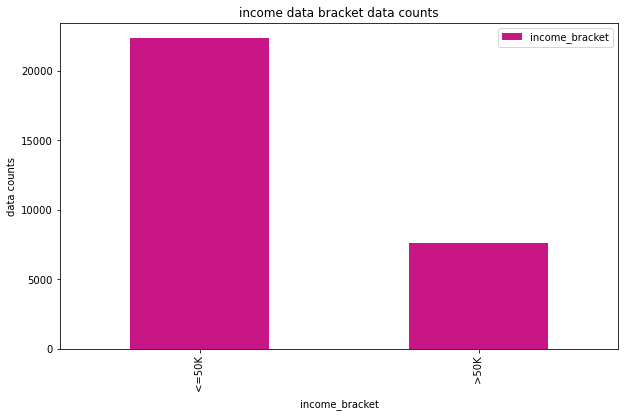

In [ ]:
#make histogram
income.plot(kind='bar', figsize=(10, 6), color='mediumvioletred')
plt.xlabel('income_bracket') # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('income data bracket data counts') # add title to the plot

plt.show()

- dapat dilihat bahwa orang yang memiliki pendapatan <= 50k lebih banyak dibanding yang memiliki pendapatan lebih dari 50k

In [ ]:
# group by income bracket berdasarkan age
age_1 = df[(df['income_bracket'] == " <=50K")].groupby(["age"])[["income_bracket"]].count()
age_2 = df[(df['income_bracket'] == " >50K")].groupby(["age"])[["income_bracket"]].count()
age_2

,income_bracket
age,
19,1
21,3
22,12
23,12
24,30
...,...
80,1
81,2
83,2


<Figure size 1080x360 with 0 Axes>

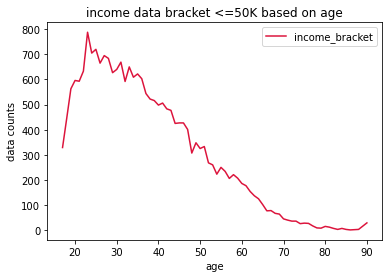

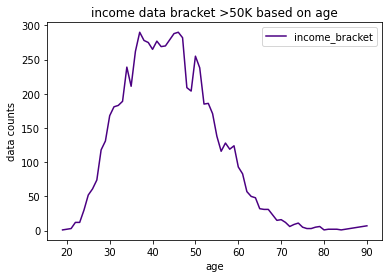

In [ ]:
#plot income by age
plt.figure(figsize=(15,5))
age_1.plot(kind='line', color='crimson')
plt.xlabel('age') # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('income data bracket <=50K based on age') # add title to the plot

age_2.plot(kind='line', color='indigo')
plt.xlabel('age')
plt.ylabel('data counts') 
plt.title('income data bracket >50K based on age') 
plt.show()

- Dapat dilihat umur mempengaruhi income dimana untuk yang pendapatan kurang dari 50k mendapat pendapatan paling tinggi pada umur 25
- untuk pendapatan lebih dari 50k pendapatan paling tinggi rata- rata pada umur 30-50 tahun

<AxesSubplot:xlabel='hours_per_week', ylabel='age'>

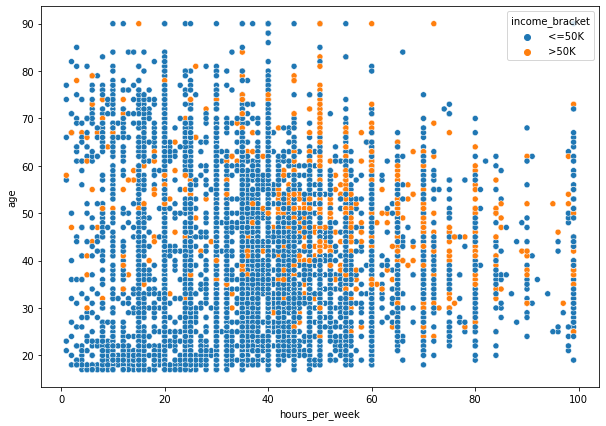

In [ ]:
# melihat income berdasarkan hours per week dan age
plt.figure(figsize = (10,7))
sns.scatterplot(x=df['hours_per_week'], y=df['age'], hue=df['income_bracket'])

- Dari analisa diatas semakin bertambah umur maka jam kerja perminggu juga semakin bertambah

In [ ]:
country =df.groupby(['native_country'])[['income_bracket']].count().sort_values('income_bracket', ascending= False)
country

,income_bracket
native_country,
United-States,26961
Mexico,563
?,528
Philippines,171
Germany,127
Canada,106
Puerto-Rico,104
India,94
El-Salvador,91


C:\Users\didit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'count')

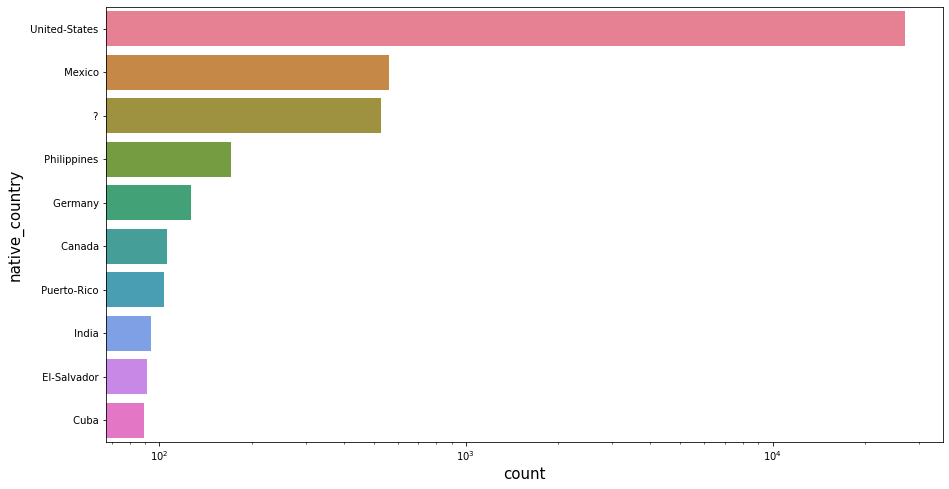

In [ ]:
# show histogram country
country = df.native_country.value_counts()[:10]
plt.figure(figsize=(15, 8))
sns.barplot(country, country.index, log=True, palette = "husl")
plt.ylabel('native_country', fontsize=15)
plt.xlabel('count', fontsize=15)

- dapat dilihat bahwa country juga memiliki pengaruh terhadap income , dimana america menjadi country dengan income terbesar kemudian disusul mexico

C:\Users\didit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


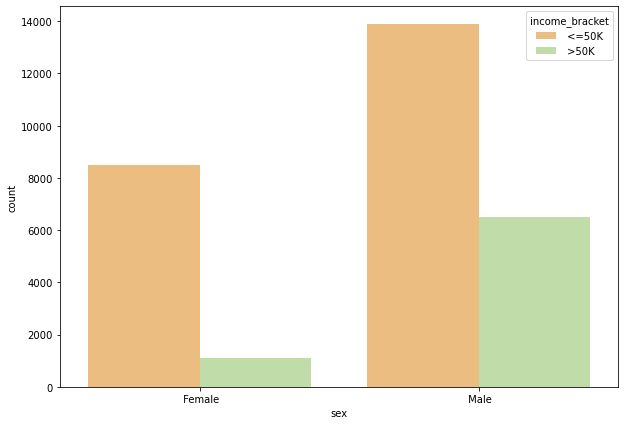

In [ ]:
#show histogram sex
plt.figure(figsize=(10,7))
sns.countplot('sex', hue= 'income_bracket', data=df, palette='Spectral')
plt.show()

- Dapat dilihat pada sex juga memiliki pengaruh terhadap income
- dimana male memiliki pendapatan lebih tinggi dari pada female

In [ ]:
workclass = df.workclass.value_counts()
workclass

 Private             22071
 Self-emp-not-inc     2498
 Local-gov            2056
 State-gov            1276
 Self-emp-inc         1109
 Federal-gov           939
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

<AxesSubplot:xlabel='income_bracket', ylabel='count'>

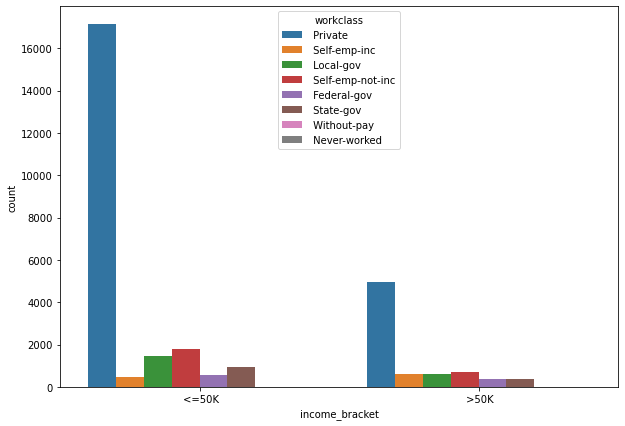

In [ ]:
#show histogram workclass
plt.figure(figsize=(10,7))
sns.countplot(x='income_bracket', hue='workclass', data=df)

- kita dapat dilihat bahwa workclass private memiliki income yang paling tinggi di antara workclass lainnya dan dapat disimpulkan bahwwa workclass memilki pengaruh terhadap income

C:\Users\didit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'count')

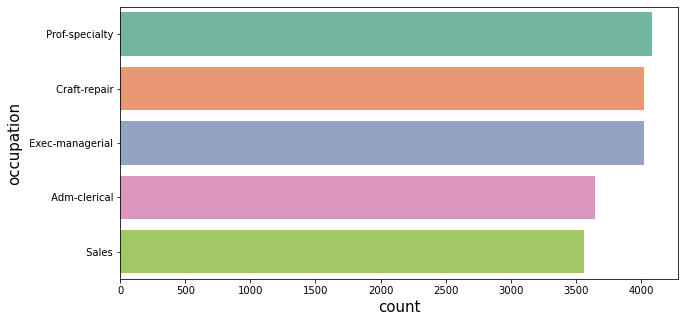

In [ ]:
# histogram occuption
ocuption = df.occupation.value_counts()[:5]
plt.figure(figsize=(10, 5))
sns.barplot(ocuption, ocuption.index, palette = "Set2")
plt.ylabel('occupation', fontsize=15)
plt.xlabel('count', fontsize=15)

- dapat dilihat 5 occuption dengan income tertinggi yaitu prof specialty dan dapat bahwa occuption ini memiliki korelasi dengan income

<AxesSubplot:xlabel='income_bracket', ylabel='count'>

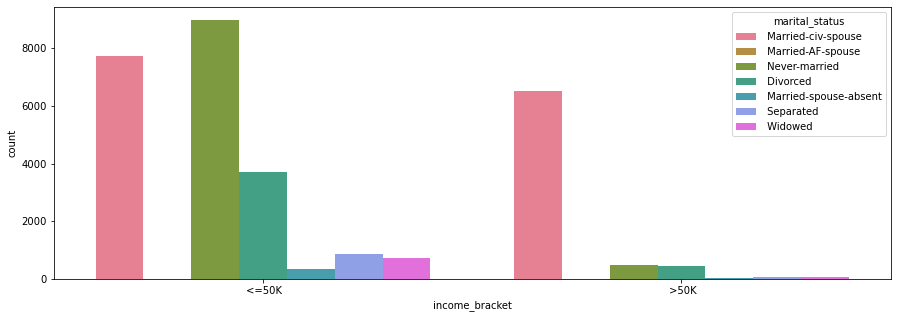

In [ ]:
# hist Income Based on Marital Status
plt.figure(figsize=(15, 5))
sns.countplot(x='income_bracket', hue='marital_status', data=df, palette = "husl")

- dilihat marital status juga memilki pengaruh terhadap income
- never married memiliki income tertinggi pada income kurang dari 50k
- married civ spouse memiliki income tertinggi pada income lebih dari 50k

C:\Users\didit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'count')

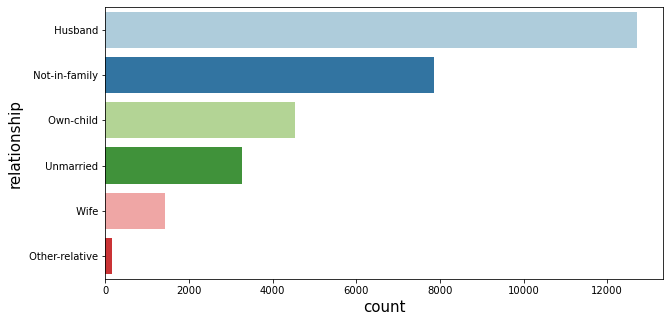

In [ ]:
relationship = df.relationship.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(relationship, relationship.index, palette = "Paired")
plt.ylabel('relationship', fontsize=15)
plt.xlabel('count', fontsize=15)

- dilihat bahwa relationship dengan income tertinggi adalah husbandd kemuadian disusul not in family kemudian dapat disimpulkan bahwa realtionship memilki hubungan dengan income

C:\Users\didit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'count')

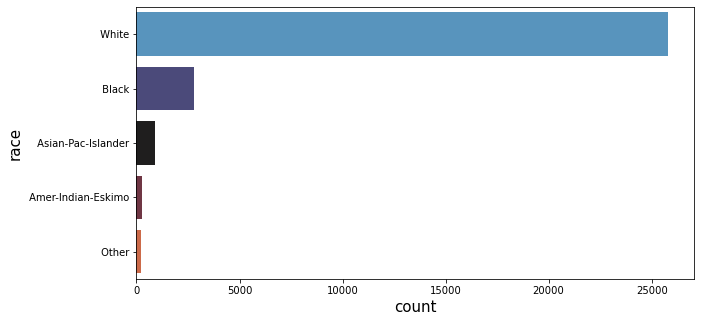

In [ ]:
ras = df.race.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(ras, ras.index, palette = "icefire")
plt.ylabel('race', fontsize=15)
plt.xlabel('count', fontsize=15)

- menurut analisa race sedikit miliki sidikit pengaruh terhadap income 
- tapi menurut personal statement memutuskan untuk tidak membuat pengaruh terhadap income dikarna dia tidak memiliki penagruh yg besar terhadap income

In [ ]:
tes = df[(df['income_bracket'] == " <=50K")]
print('gain mean = ', tes['capital_gain'].mean())
print('loss mean = ', tes['capital_loss'].mean())
print('gain - loss mean = ', tes['capital_gain'].mean() - tes['capital_loss'].mean())
print('-'*100)

tes2 = df[(df['income_bracket'] == " >50K")]
print('gain mean = ', tes2['capital_gain'].mean())
print('loss mean = ', tes2['capital_loss'].mean())
print('gain - loss mean = ', tes2['capital_gain'].mean() - tes2['capital_loss'].mean())

gain mean =  148.11657347349586
loss mean =  54.070632968016106
gain - loss mean =  94.04594050547976
----------------------------------------------------------------------------------------------------
gain mean =  3999.192252133946
loss mean =  194.9897570584373
gain - loss mean =  3804.202495075509


gain - loss pada income bracket tinggi lebih tinggi dibanding income bracket rendah. Maka dapat disimpulkan bahwa peserta dengan income tinggi memiliki keuntungan capital lebih besar, maka kedua kolom ini memiliki potensi mempengaruhi income bracket, walaupun msh terdapat data yang memiliki nilai 0 

**###########**

## Get data for model inference

In [ ]:
## Get data for model inference
data_inf = df.sample(21, random_state=69)
data_inf

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
25067,40,Private,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,0,35,United-States,<=50K
27324,62,State-gov,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Male,14084,0,40,United-States,>50K
383,30,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,30,United-States,<=50K
28349,31,Private,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,52,United-States,<=50K
4899,32,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
13660,60,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
5974,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,5178,0,40,United-States,>50K
14890,18,Private,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,30,United-States,<=50K
29391,40,Private,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,40,United-States,<=50K
18038,20,Private,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# remove inference set from data set
data_train_test = df.drop(data_inf.index)
data_train_test

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K
2,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
3,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29965,27,Private,5th-6th,3,Never-married,Handlers-cleaners,Other-relative,White,Male,0,0,40,Guatemala,<=50K
29966,52,Private,5th-6th,3,Married-spouse-absent,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,<=50K
29967,28,Private,5th-6th,3,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,<=50K
29968,58,Local-gov,5th-6th,3,Divorced,Other-service,Other-relative,Black,Female,0,0,40,Haiti,<=50K


In [ ]:
#reset index to reduce error
data_train_test.reset_index(drop= True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,40,Private,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,0,35,United-States,<=50K
1,62,State-gov,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Male,14084,0,40,United-States,>50K
2,30,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,30,United-States,<=50K
3,31,Private,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,52,United-States,<=50K
4,32,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
5,60,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
6,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,5178,0,40,United-States,>50K
7,18,Private,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,30,United-States,<=50K
8,40,Private,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,40,United-States,<=50K
9,20,Private,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States,<=50K


## Splitting between `X` (Features) and `y` (Target)

In [ ]:
# Split between `X` (Features) and `y` (Target)

X = data_train_test.drop('income_bracket', axis=1)
y = data_train_test['income_bracket']
X

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States
1,72,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States
2,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States
3,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
4,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29944,27,Private,5th-6th,3,Never-married,Handlers-cleaners,Other-relative,White,Male,0,0,40,Guatemala
29945,52,Private,5th-6th,3,Married-spouse-absent,Craft-repair,Other-relative,White,Male,0,0,40,Mexico
29946,28,Private,5th-6th,3,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico
29947,58,Local-gov,5th-6th,3,Divorced,Other-service,Other-relative,Black,Female,0,0,40,Haiti


In [ ]:
# Split between Train-Set and Test-Set 80% dan 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (23959, 13)
Test Size  :  (5990, 13)


## Handling outliers

kita akan melakukan handling outliers pada X_Train

In [ ]:
# make function to see histogram distribusion data dan box plot outliers
def diagnostic_plots(X_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')

    plt.show()

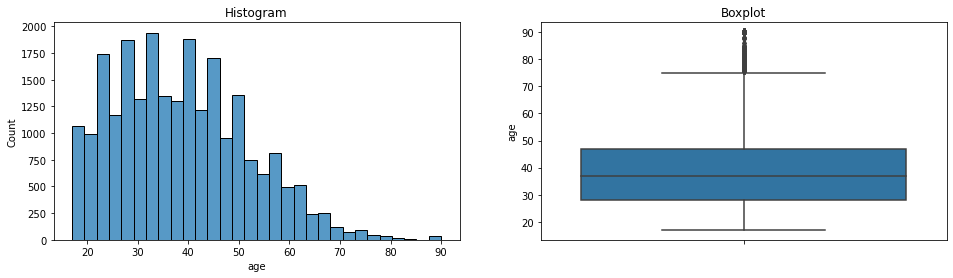


Skewness Value :  0.520906724546413


In [ ]:
# mengecek outliers pada column age
diagnostic_plots(X_train, 'age')
print('\nSkewness Value : ', X_train['age'].skew())

- dari analisa yang didapat terlihat nilai skew sebesar 0,52
- menurut personal stateman nilai skew 0,52 dapat di bulatkan ke 0,5 sehingga bentuk distribusinya normal 
- Age dianggap memiliki outlier dikarenakan akan sangat susah bagi peserta sensus diatas umur 80 masih memiliki penghasilan (sudah pensiun) sehingga ini dianggap bukan outlier natural

### Outlier detection for normal distribusion

In [ ]:
def find_normal_boundaries(X_train, variable):
    upper_boundary = X_train[variable].mean() + 3 * X_train[variable].std()
    lower_boundary = X_train[variable].mean() - 3 * X_train[variable].std()

    return upper_boundary, lower_boundary

In [ ]:
# calculate boundaries for age
upper_boundary, lower_boundary = find_normal_boundaries(X_train, 'age')
upper_boundary, lower_boundary

(77.83312413765876, -0.7267340546002004)

In [ ]:
print(upper_boundary, lower_boundary)
print('age : {}'.format(len(X_train)))
print('age bigger than 77   : {}'.format(len(X_train[X_train['age'] > upper_boundary])))
print('')
print('age bigger than 77: {}'.format(len(X_train[X_train['age'] > upper_boundary])/len(X_train) * 100))

77.83312413765876 -0.7267340546002004
age : 23959
age bigger than 77   : 95

age bigger than 77: 0.3965107057890563


- karena jumlah outlier hanya sedikit sekitar 0.39 % maka kita akan melakukan Trimming dalam handling outlier

### Trimming

kita memilih menggunakan metode trimming dalam handle Outliers Karena Jumlah outliers pada data hanya sedikit yaitu dibawah 4% dari keseleruhan data oleh karna itu kiata mimilih metode trimming

In [ ]:
# Flag the outliers column age
outliers_age = np.where(X_train['age'] > upper_boundary, True,
                       np.where(X_train['age'] < lower_boundary, True, False))

In [ ]:
# lakukan trim pada dataset

Xtrain_trimmed = X_train.loc[~(outliers_age)]
print('Size dataset - Before trimming : ', X_train.shape)
print('Size dataset - After trimming  : ', Xtrain_trimmed.shape)

Size dataset - Before trimming :  (23959, 13)
Size dataset - After trimming  :  (23864, 13)



distance - After Trimming


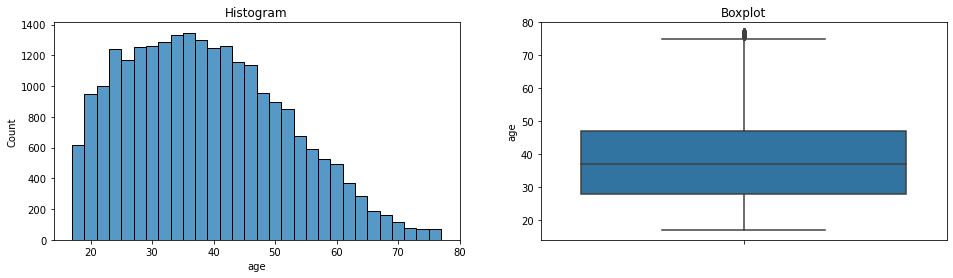

In [ ]:
# melihat histogram dan box plot setalah removed outliers
print('\ndistance - After Trimming')
diagnostic_plots(Xtrain_trimmed, 'age')

In [ ]:
#menyamakan index xtrain dan y train

In [ ]:
Xtrain_trimmed.shape

(23864, 13)

In [ ]:
y_train.shape

(23959,)

In [ ]:
y_test.shape

(5990,)

In [ ]:
y_train.drop(y_train.index.difference(Xtrain_trimmed.index), inplace=True)

In [ ]:
y_train.shape

(23864,)

## Handling missing Value

karena terdapat missing value pada column price maka akan dilakukan handling pada missing tersebut pada train dan test

In [ ]:
# Check Missing Values in `X_train`
X_train.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [ ]:
# Check Missing Values in `X_test`

X_test.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [ ]:
# Check Missing Values in `y_train`

y_train.isnull().sum()

0

In [ ]:
# Check Missing Values in `y_test`

y_test.isnull().sum()

0

- Dari analisa yang kita lakukan dibuktikan bahwa dataset tidak memiliki missing value

## cardinality

melakukan cardinality pada dataset

In [ ]:
# meilihat unique value pada xtrain
for i in Xtrain_trimmed.columns:
    print(i," : ", len(Xtrain_trimmed[i].unique()))

age  :  61
workclass  :  8
education  :  16
education_num  :  16
marital_status  :  7
occupation  :  15
relationship  :  6
race  :  5
sex  :  2
capital_gain  :  113
capital_loss  :  86
hours_per_week  :  93
native_country  :  41


In [ ]:
#melihat unique value pada Xtest
for i in X_test.columns:
    print(i," : ", len(X_test[i].unique()))

age  :  70
workclass  :  8
education  :  16
education_num  :  16
marital_status  :  7
occupation  :  15
relationship  :  6
race  :  5
sex  :  2
capital_gain  :  88
capital_loss  :  59
hours_per_week  :  80
native_country  :  41


- Dapat dilihat bahwa unique value yang dimiliki capital gain dan loss sangat besar oleh karna itu kita kan melakukan cardinality

In [ ]:
# Let's re-map capital gain into numbers so we can use it to train ML models
# I will replace each capital gain by a number
# to quickly demonstrate the effect of
# labels on machine learning algorithms

gain_dict = {k: i for i, k in enumerate(Xtrain_trimmed.capital_gain.unique(), 0)}
print('gain_dict : ', gain_dict)
print('Total capital gain Unique - X_train : ', len(Xtrain_trimmed.capital_gain.unique()))

gain_dict :  {0: 0, 7298: 1, 7688: 2, 8614: 3, 3103: 4, 15024: 5, 3325: 6, 10566: 7, 4650: 8, 14084: 9, 10520: 10, 14344: 11, 2174: 12, 2202: 13, 3908: 14, 594: 15, 99999: 16, 3942: 17, 5178: 18, 2829: 19, 10605: 20, 4101: 21, 5013: 22, 2176: 23, 4865: 24, 3411: 25, 2105: 26, 6097: 27, 2597: 28, 13550: 29, 914: 30, 3456: 31, 2407: 32, 4386: 33, 1471: 34, 2885: 35, 1409: 36, 20051: 37, 3137: 38, 6849: 39, 2977: 40, 3464: 41, 4787: 42, 2290: 43, 4064: 44, 2907: 45, 5721: 46, 1151: 47, 4416: 48, 2653: 49, 2354: 50, 9562: 51, 3674: 52, 7443: 53, 2964: 54, 15020: 55, 3781: 56, 6497: 57, 27828: 58, 114: 59, 1797: 60, 7430: 61, 25236: 62, 4687: 63, 6514: 64, 9386: 65, 2635: 66, 1055: 67, 4934: 68, 1424: 69, 5455: 70, 2463: 71, 6418: 72, 1506: 73, 41310: 74, 3471: 75, 15831: 76, 2414: 77, 2961: 78, 3273: 79, 5556: 80, 2580: 81, 1831: 82, 1639: 83, 34095: 84, 2050: 85, 2228: 86, 2009: 87, 6360: 88, 3887: 89, 1173: 90, 2993: 91, 4508: 92, 991: 93, 2062: 94, 3818: 95, 6723: 96, 6767: 97, 2036: 98

In [ ]:
#meliha unqiue capital loss
loss_dict = {k: i for i, k in enumerate(Xtrain_trimmed.capital_loss.unique(), 0)}
print('loss_dict : ', loss_dict)
print('Total capital loss Unique - X_train : ', len(Xtrain_trimmed.capital_loss.unique()))

loss_dict :  {0: 0, 2001: 1, 1887: 2, 1741: 3, 1485: 4, 1672: 5, 1974: 6, 1408: 7, 1848: 8, 1977: 9, 1504: 10, 1719: 11, 323: 12, 1902: 13, 1980: 14, 2444: 15, 2179: 16, 2415: 17, 1380: 18, 1762: 19, 2231: 20, 1564: 21, 2258: 22, 1590: 23, 1340: 24, 1844: 25, 1721: 26, 2205: 27, 1651: 28, 2377: 29, 1579: 30, 1092: 31, 1669: 32, 2547: 33, 1876: 34, 1740: 35, 1628: 36, 2559: 37, 2339: 38, 2057: 39, 213: 40, 2201: 41, 2051: 42, 2002: 43, 653: 44, 1573: 45, 2603: 46, 1825: 47, 1594: 48, 3004: 49, 2824: 50, 2392: 51, 1602: 52, 2149: 53, 2174: 54, 2206: 55, 1668: 56, 2042: 57, 625: 58, 2754: 59, 2246: 60, 1617: 61, 1755: 62, 880: 63, 2238: 64, 3770: 65, 1648: 66, 1726: 67, 1258: 68, 974: 69, 2080: 70, 2352: 71, 1138: 72, 810: 73, 2457: 74, 2472: 75, 2467: 76, 1539: 77, 2267: 78, 1735: 79, 1944: 80, 2129: 81, 419: 82, 3900: 83, 2282: 84, 1816: 85}
Total capital loss Unique - X_train :  86


In [ ]:
# Replace the value in capital gain, using the dict `gain_dict` created above
Xtrain_trimmed.loc[:, 'gain_new'] = Xtrain_trimmed.loc[:, 'capital_gain'].map(gain_dict)
X_test.loc[:, 'gain_new'] = X_test.loc[:, 'capital_gain'].map(gain_dict)

Xtrain_trimmed[['gain_new', 'capital_gain']].head(10)

C:\Users\didit\AppData\Local\Temp\ipykernel_18192\2844233136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain_trimmed.loc[:, 'gain_new'] = Xtrain_trimmed.loc[:, 'capital_gain'].map(gain_dict)


,gain_new,capital_gain
7098,0,0
6198,1,7298
19359,0,0
12515,0,0
1651,0,0
20128,0,0
13719,0,0
15148,0,0
2087,0,0
1362,0,0


In [ ]:
# Replace the value in capital loss, using the dict `loss_dict` created above
Xtrain_trimmed.loc[:, 'loss_new'] = Xtrain_trimmed.loc[:, 'capital_loss'].map(loss_dict)
X_test.loc[:, 'loss_new'] = X_test.loc[:, 'capital_loss'].map(loss_dict)

Xtrain_trimmed[['loss_new', 'capital_loss']].head(10)

C:\Users\didit\AppData\Local\Temp\ipykernel_18192\1963571798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain_trimmed.loc[:, 'loss_new'] = Xtrain_trimmed.loc[:, 'capital_loss'].map(loss_dict)


,loss_new,capital_loss
7098,0,0
6198,0,0
19359,0,0
12515,0,0
1651,0,0
20128,0,0
13719,0,0
15148,0,0
2087,0,0
1362,0,0


In [ ]:
# Display row in `X_test` that contains missing values
X_test.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
gain_new          8
loss_new          3
dtype: int64

In [ ]:
# with median missing value
# missing value gain new
median = X_test['gain_new'].median()
X_test['gain_new'].fillna(median, inplace =True)

In [ ]:
# missing value loss new
median = X_test['loss_new'].median()
X_test['loss_new'].fillna(median, inplace =True)

In [ ]:
X_test.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
gain_new          0
loss_new          0
dtype: int64

In [ ]:
#Drop kolom 'capital_gain' dan 'capital_loss'
Xtrain_trimmed.drop(['capital_gain','capital_loss'], axis=1, inplace=True)
X_test.drop(['capital_gain','capital_loss'], axis=1, inplace=True)
Xtrain_trimmed

C:\Users\didit\AppData\Local\Temp\ipykernel_18192\4061387054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain_trimmed.drop(['capital_gain','capital_loss'], axis=1, inplace=True)


,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,gain_new,loss_new
7098,43,Local-gov,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,40,United-States,0,0
6198,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,1,0
19359,26,Private,HS-grad,9,Never-married,Adm-clerical,Unmarried,Black,Female,30,United-States,0,0
12515,62,Private,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,60,United-States,0,0
1651,39,Private,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,60,United-States,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25015,48,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,50,United-States,0,0
9818,35,Private,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,40,Philippines,0,0
27243,25,Private,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,40,United-States,0,0
4041,53,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,0,0


## Feature Selection

Pada bagian ini akan dilakukan pemilihan feature (kolom) apa saja yang akan digunakan

In [ ]:
#display Xtrain
Xtrain_trimmed

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,gain_new,loss_new
7098,43,Local-gov,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,40,United-States,0,0
6198,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,1,0
19359,26,Private,HS-grad,9,Never-married,Adm-clerical,Unmarried,Black,Female,30,United-States,0,0
12515,62,Private,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,60,United-States,0,0
1651,39,Private,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,60,United-States,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25015,48,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,50,United-States,0,0
9818,35,Private,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,40,Philippines,0,0
27243,25,Private,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,40,United-States,0,0
4041,53,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,0,0


Berdasarakan Personal Judgement di EDA, akan diasumsikan bahwa kolom race tidak memilki hubungan atau korelasi dengan income_bracket karena , apapun race yang dimiliki semua berhak mendapat kesempatan mendapat income

In [ ]:
# Drop Column `race`

Xtrain_trimmed.drop('race', axis=1, inplace=True)
X_test.drop('race', axis=1, inplace=True)
Xtrain_trimmed

C:\Users\didit\AppData\Local\Temp\ipykernel_18192\2539037347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain_trimmed.drop('race', axis=1, inplace=True)


,age,workclass,education,education_num,marital_status,occupation,relationship,sex,hours_per_week,native_country,gain_new,loss_new
7098,43,Local-gov,Masters,14,Married-civ-spouse,Prof-specialty,Husband,Male,40,United-States,0,0
6198,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,50,United-States,1,0
19359,26,Private,HS-grad,9,Never-married,Adm-clerical,Unmarried,Female,30,United-States,0,0
12515,62,Private,Some-college,10,Married-civ-spouse,Transport-moving,Husband,Male,60,United-States,0,0
1651,39,Private,10th,6,Married-civ-spouse,Craft-repair,Husband,Male,60,United-States,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25015,48,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,Female,50,United-States,0,0
9818,35,Private,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,Male,40,Philippines,0,0
27243,25,Private,Bachelors,13,Never-married,Exec-managerial,Not-in-family,Male,40,United-States,0,0
4041,53,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,40,United-States,0,0


## Split between Numerical Columns and Categorical Columns

In [ ]:
# Get Numerical Columns and Categorical Columns

num_columns = ['age']
cat_columns = ['workclass', 'education', 'marital_status','occupation','relationship','sex','native_country','gain_new', 'loss_new','education_num']

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['age']
Categorical Columns :  ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'sex', 'native_country', 'gain_new', 'loss_new', 'education_num']


In [ ]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = Xtrain_trimmed[num_columns]
X_train_cat = Xtrain_trimmed[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,age
7098,43
6198,51
19359,26
12515,62
1651,39
...,...
25015,48
9818,35
27243,25
4041,53


## Feature Scaling

Karena distribusi data age termasuk normal distriibusion maka akan di lakukannya standar scaler

In [ ]:
X_train_num

,age
7098,43
6198,51
19359,26
12515,62
1651,39
...,...
25015,48
9818,35
27243,25
4041,53


In [ ]:
# Feature Scaling using standarscaler

scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[ 0.36148738],
       [ 0.98649669],
       [-0.96665741],
       ...,
       [-1.04478357],
       [ 1.14274901],
       [ 1.14274901]])

## Feature Encoding

In [ ]:
# Display `X_train_cat`

X_train_cat

,workclass,education,marital_status,occupation,relationship,sex,native_country,gain_new,loss_new,education_num
7098,Local-gov,Masters,Married-civ-spouse,Prof-specialty,Husband,Male,United-States,0,0,14
6198,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Male,United-States,1,0,9
19359,Private,HS-grad,Never-married,Adm-clerical,Unmarried,Female,United-States,0,0,9
12515,Private,Some-college,Married-civ-spouse,Transport-moving,Husband,Male,United-States,0,0,10
1651,Private,10th,Married-civ-spouse,Craft-repair,Husband,Male,United-States,0,0,6
...,...,...,...,...,...,...,...,...,...,...
25015,Private,HS-grad,Never-married,Exec-managerial,Not-in-family,Female,United-States,0,0,9
9818,Private,Bachelors,Married-civ-spouse,Craft-repair,Husband,Male,Philippines,0,0,13
27243,Private,Bachelors,Never-married,Exec-managerial,Not-in-family,Male,United-States,0,0,13
4041,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,United-States,0,0,9


In [ ]:
#kita akan melakukan split kepada Xtrain_cat dan Xtest_cat karena column capital gain,capital loss dan education num sudah termasuk encoded
X_train_cat_encodedd = X_train_cat[['workclass','education','marital_status','occupation','relationship','sex','native_country']]
X_train_cat_nonencoded = X_train_cat[['education_num','gain_new','loss_new']]

X_test_cat_encodedd = X_test_cat[['workclass','education','marital_status','occupation','relationship','sex','native_country']]
X_test_cat_nonencoded = X_test_cat[['education_num','gain_new','loss_new']]

X_train_cat_encodedd

,workclass,education,marital_status,occupation,relationship,sex,native_country
7098,Local-gov,Masters,Married-civ-spouse,Prof-specialty,Husband,Male,United-States
6198,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Male,United-States
19359,Private,HS-grad,Never-married,Adm-clerical,Unmarried,Female,United-States
12515,Private,Some-college,Married-civ-spouse,Transport-moving,Husband,Male,United-States
1651,Private,10th,Married-civ-spouse,Craft-repair,Husband,Male,United-States
...,...,...,...,...,...,...,...
25015,Private,HS-grad,Never-married,Exec-managerial,Not-in-family,Female,United-States
9818,Private,Bachelors,Married-civ-spouse,Craft-repair,Husband,Male,Philippines
27243,Private,Bachelors,Never-married,Exec-managerial,Not-in-family,Male,United-States
4041,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,United-States


In [ ]:
# Feature Encoding using Onehot Encoder

encoder = OneHotEncoder()
encoder.fit(X_train_cat_encodedd)

X_train_cat_encoded = encoder.transform(pd.DataFrame(X_train_cat_encodedd)).toarray()
X_test_cat_encoded = encoder.transform(pd.DataFrame(X_test_cat_encodedd)).toarray()
X_train_cat_encoded

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

## Concate between Numerical Columns and Categorical Columns

In [ ]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded,X_train_cat_nonencoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded,X_test_cat_nonencoded], axis=1)
X_test_final

array([[ 2.15838914,  0.        ,  0.        , ..., 10.        ,
         0.        ,  0.        ],
       [-1.35728823,  0.        ,  0.        , ..., 10.        ,
         0.        ,  0.        ],
       [-1.12290973,  0.        ,  0.        , ...,  9.        ,
         0.        ,  0.        ],
       ...,
       [-1.51354055,  0.        ,  0.        , ...,  7.        ,
         0.        ,  0.        ],
       [-1.51354055,  0.        ,  0.        , ...,  9.        ,
         0.        ,  0.        ],
       [-0.10726961,  0.        ,  0.        , ..., 10.        ,
         0.        ,  0.        ]])

##  Encoding Y target

dikarenakan bentukd dari target kita kategorical maka perlu dilakuakan encoding menggunakan Label Encoder

In [ ]:
#Encoding target
labelencoder = preprocessing.LabelEncoder()
labelencoder.fit(y_train)

LabelEncoder()

In [ ]:
#classes dari label encoder
labelencoder.classes_

array([' <=50K', ' >50K'], dtype=object)

In [ ]:
#transform y target
y_train_encoded = labelencoder.transform(y_train)
y_test_encoded = labelencoder.transform(y_test)

In [ ]:
y_test_encoded

array([0, 0, 0, ..., 0, 0, 1])

kita telah mekukan label encoder dimana
- 0 = <=50k
- 1 = >50k

Algoritma yang akan dipakai adalah Logistic Regression dan Support Vektor Classifier.

Dengan metrics yang akan dipakai untuk mengevaluasi adalah accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix untuk mengetahui recall, precision, nilai akurasi, dan melihat banyaknya data yang salah predict.

kita menggunakan SVC juga dikareenankan data yg kita miliki berbentuk clisffcation

In [ ]:
#Training using Logistic regression
log_model = LogisticRegression()

In [ ]:
#Training using SVC 
SVC_model = SVC(kernel='poly',C=21,degree=3)

In [ ]:
# Train model menggunakan dataset X dan y train
log_model.fit(X_train_final, y_train_encoded)

C:\Users\didit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Train model menggunakan dataset X dan y train
SVC_model.fit(X_train_final, y_train_encoded)

SVC(C=21, kernel='poly')

## LOGISTIC REGRESSION

In [ ]:
#Lakukan predict bagi test dan train
y_pred_train = log_model.predict(X_train_final)
y_pred_test = log_model.predict(X_test_final)

In [ ]:
print('accuracy score train : ',accuracy_score(y_train_encoded,y_pred_train))
print('accuracy score test : ',accuracy_score(y_test_encoded,y_pred_test))

accuracy score train :  0.8247150519611129
accuracy score test :  0.8292153589315526


Accuracy score cukup bagus, tidak jauh berbeda satu sama lain juga karena rentang accuracy score yaitu 0-1

In [ ]:
log_model.classes_

array([0, 1])

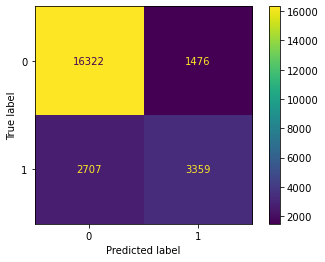

In [ ]:
cm = confusion_matrix(y_train_encoded, y_pred_train, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

disp.plot()
plt.show()

- Dari analisa diatas didapat bahwa y_train meakukan kesalhan prediksi dikarenakan accurasi scor kita masih berada pada angka 0,82

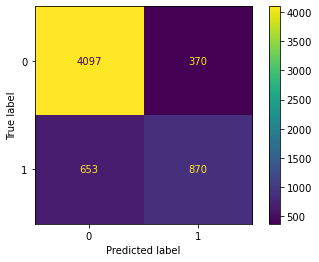

In [ ]:
cm = confusion_matrix(y_test_encoded, y_pred_test, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

disp.plot()
plt.show()

- Dari analisa di atas didapatkan bahwa y_test masih terdapat keslahan prediksi dikarenakan accurasi scor masih berada pada angka 0,829

In [ ]:
print(classification_report(y_test_encoded,y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4467
           1       0.70      0.57      0.63      1523

    accuracy                           0.83      5990
   macro avg       0.78      0.74      0.76      5990
weighted avg       0.82      0.83      0.82      5990



In [ ]:
print(classification_report(y_train_encoded,y_pred_train))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     17798
           1       0.69      0.55      0.62      6066

    accuracy                           0.82     23864
   macro avg       0.78      0.74      0.75     23864
weighted avg       0.82      0.82      0.82     23864



pada classification report yang dilihat adalah baris '1' yang menandakan income > 50 K. dimana precision 0.69 untuk train dan 0.70 untuk test. Secara precission lebih baik namun secara recall mendapat score yang sangat rendah namun ada beberapa hal yang perlu dilakukan untuk improvement. Seperti pengurangan atau penambahan feature, atau mencoba dengan model/parameter lain.

## SVC

In [ ]:
#Lakukan predict bagi test dan train
y_pred_train2 = SVC_model.predict(X_train_final)
y_pred_test2 = SVC_model.predict(X_test_final)

In [ ]:
print('accuracy score train : ',accuracy_score(y_train_encoded,y_pred_train2))
print('accuracy score test : ',accuracy_score(y_test_encoded,y_pred_test2))

accuracy score train :  0.8342691920885015
accuracy score test :  0.8332220367278798


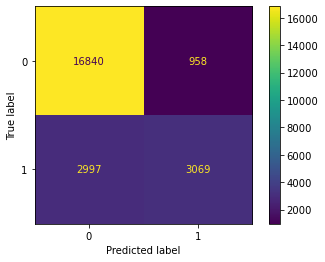

In [ ]:
#y_train predict
cm = confusion_matrix(y_train_encoded, y_pred_train2, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

disp.plot()
plt.show()

- Dari analisa diatas didapat bahwa y_train meakukan kesalhan prediksi dikarenakan accurasi scor kita masih berada pada angka 0,83

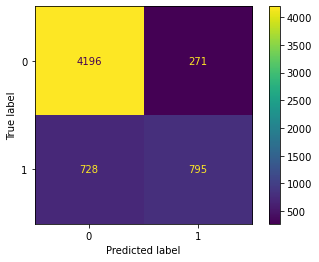

In [ ]:
#y_test predict
cm = confusion_matrix(y_test_encoded, y_pred_test2, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

disp.plot()
plt.show()

- Dari analisa diatas didapat bahwa y_test meakukan kesalhan prediksi dikarenakan accurasi scor kita masih berada pada angka 0,833

In [ ]:
print(classification_report(y_test_encoded,y_pred_test2))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4467
           1       0.75      0.52      0.61      1523

    accuracy                           0.83      5990
   macro avg       0.80      0.73      0.75      5990
weighted avg       0.83      0.83      0.82      5990



In [ ]:
print(classification_report(y_train_encoded,y_pred_train2))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89     17798
           1       0.76      0.51      0.61      6066

    accuracy                           0.83     23864
   macro avg       0.81      0.73      0.75     23864
weighted avg       0.83      0.83      0.82     23864



pada classification report yang dilihat adalah baris '1' yang menandakan income > 50 K. dimana precision 0.76 untuk train dan 0.75 untuk test. Secara precission lebih baik namun secara recall mendapat score yang sangat rendah namun ada beberapa hal yang perlu dilakukan untuk improvement. Seperti pengurangan atau penambahan feature, atau mencoba dengan model/parameter lain.

Masih terjadi kelemahan prediksi pada kategori 1 Sehingga model belum banyak belajar mengenai kategori ini dan meningkatkan missprediction

Lakukan test terhadap data inference (data yang akan ada di masa depan)

In [ ]:
#show data_inf
data_inf.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,40,Private,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,0,35,United-States,<=50K
1,62,State-gov,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Male,14084,0,40,United-States,>50K
2,30,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,30,United-States,<=50K
3,31,Private,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,52,United-States,<=50K
4,32,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K


In [ ]:
data_inf1 = data_inf.copy()

***NOTE :pada data inference kita tidak akan melakukan handling outliers***

In [ ]:
# mengecek missing value
data_inf.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

In [ ]:
# melakukan cardinality pada capital gain dan capital loss
# Let's re-map capital gain into numbers so we can use it to train ML models
# I will replace each capital gain by a number
# to quickly demonstrate the effect of
# labels on machine learning algorithms

gain_dict_inf = {k: i for i, k in enumerate(data_inf.capital_gain.unique(), 0)}
print('gain_dict_inf : ', gain_dict_inf)
print('Total capital gain Unique - data_inf : ', len(data_inf.capital_gain.unique()))

gain_dict_inf :  {0: 0, 14084: 1, 5178: 2, 4650: 3}
Total capital gain Unique - data_inf :  4


In [ ]:
# melihat unique di capital loss
loss_dict_inf = {k: i for i, k in enumerate(data_inf.capital_loss.unique(), 0)}
print('loss_dict_inf : ', loss_dict_inf)
print('Total capital loss Unique - data_inf : ', len(data_inf.capital_loss.unique()))

loss_dict_inf :  {0: 0}
Total capital loss Unique - data_inf :  1


In [ ]:
# Replace the value in capital gain, using the dict `gain_dict` created above
data_inf.loc[:, 'gain_new'] = data_inf.loc[:, 'capital_gain'].map(gain_dict_inf)
data_inf.loc[:, 'loss_new'] = data_inf.loc[:, 'capital_loss'].map(loss_dict_inf)
data_inf

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,gain_new,loss_new
0,40,Private,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,0,35,United-States,<=50K,0,0
1,62,State-gov,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Male,14084,0,40,United-States,>50K,1,0
2,30,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,30,United-States,<=50K,0,0
3,31,Private,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,52,United-States,<=50K,0,0
4,32,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K,0,0
5,60,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K,0,0
6,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,5178,0,40,United-States,>50K,2,0
7,18,Private,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,30,United-States,<=50K,0,0
8,40,Private,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,40,United-States,<=50K,0,0
9,20,Private,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States,<=50K,0,0


In [ ]:
#Drop kolom 'capital_gain' dan 'capital_loss'
data_inf.drop(['capital_gain','capital_loss'], axis=1, inplace=True)
data_inf

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income_bracket,gain_new,loss_new
0,40,Private,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,35,United-States,<=50K,0,0
1,62,State-gov,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Male,40,United-States,>50K,1,0
2,30,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,30,United-States,<=50K,0,0
3,31,Private,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,52,United-States,<=50K,0,0
4,32,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,40,United-States,<=50K,0,0
5,60,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,<=50K,0,0
6,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,2,0
7,18,Private,12th,8,Never-married,Other-service,Own-child,White,Male,30,United-States,<=50K,0,0
8,40,Private,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,40,United-States,<=50K,0,0
9,20,Private,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,20,United-States,<=50K,0,0


In [ ]:
#mengecek missing value setealh di cardinal
data_inf.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
hours_per_week    0
native_country    0
income_bracket    0
gain_new          0
loss_new          0
dtype: int64

In [ ]:
#Split data inference berdasarkan kolom numeric dan categoric
data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]

In [ ]:
data_inf_num

,age
0,40
1,62
2,30
3,31
4,32
5,60
6,47
7,18
8,40
9,20


In [ ]:
#Feature scalling
datainf_num_scaled = scaler.transform(data_inf_num)
datainf_num_scaled.shape

(21, 1)

In [ ]:
#Feature Encoding
#kita akan melakukan split kepada Xtrain_cat dan Xtest_cat karena column capital gain,capital loss dan education num sudah termasuk encoded
datainf_cat_encodedd = data_inf_cat[['workclass','education','marital_status','occupation','relationship','sex','native_country']]
datainf_cat_nonencoded = data_inf_cat[['education_num','gain_new','loss_new']]
datainf_cat_encodedd

,workclass,education,marital_status,occupation,relationship,sex,native_country
0,Private,HS-grad,Divorced,Transport-moving,Not-in-family,Male,United-States
1,State-gov,Bachelors,Divorced,Prof-specialty,Not-in-family,Male,United-States
2,Private,HS-grad,Married-civ-spouse,Sales,Wife,Female,United-States
3,Private,Some-college,Never-married,Adm-clerical,Not-in-family,Female,United-States
4,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,Male,United-States
5,Self-emp-not-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,Male,United-States
6,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Male,United-States
7,Private,12th,Never-married,Other-service,Own-child,Male,United-States
8,Private,Some-college,Never-married,Adm-clerical,Not-in-family,Female,United-States
9,Private,Some-college,Never-married,Handlers-cleaners,Own-child,Male,United-States


In [ ]:
datainf_cat_encoded = encoder.transform(pd.DataFrame(datainf_cat_encodedd)).toarray()
datainf_cat_encoded.shape

(21, 95)

In [ ]:
# Concate Columns between numerical and categorical

datainf_final = np.concatenate([datainf_num_scaled, datainf_cat_encoded,datainf_cat_nonencoded], axis=1)
datainf_final

array([[ 0.12710889,  0.        ,  0.        , ...,  9.        ,
         0.        ,  0.        ],
       [ 1.84588449,  0.        ,  0.        , ..., 13.        ,
         1.        ,  0.        ],
       [-0.65415275,  0.        ,  0.        , ...,  9.        ,
         0.        ,  0.        ],
       ...,
       [ 0.67399203,  0.        ,  0.        , ...,  4.        ,
         0.        ,  0.        ],
       [ 1.45525367,  0.        ,  0.        , ...,  9.        ,
         0.        ,  0.        ],
       [-0.73227892,  0.        ,  0.        , ...,  9.        ,
         0.        ,  0.        ]])

## LOGISTIC REGRESSION

In [ ]:
# Predict using Logistic Regression

y_pred_inf_LR = log_model.predict(datainf_final)
y_pred_inf_LR

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#convert kembali nama label ke sebelumnya
y_pred_inf_LR = labelencoder.inverse_transform(y_pred_inf_LR)

In [ ]:
# Create DataFrame of income_bracket Prediction

y_pred_inf_df = pd.DataFrame(y_pred_inf_LR, columns=['income_Prediction'])
y_pred_inf_df

,income_Prediction
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
5,>50K
6,<=50K
7,<=50K
8,<=50K
9,<=50K


In [ ]:
# Concate between Inference-Set and rating's Prediction

pd.concat([data_inf1, y_pred_inf_df], axis=1)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,income_Prediction
0,40,Private,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,0,35,United-States,<=50K,<=50K
1,62,State-gov,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Male,14084,0,40,United-States,>50K,<=50K
2,30,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,30,United-States,<=50K,<=50K
3,31,Private,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,52,United-States,<=50K,<=50K
4,32,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K,<=50K
5,60,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K,>50K
6,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,5178,0,40,United-States,>50K,<=50K
7,18,Private,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,30,United-States,<=50K,<=50K
8,40,Private,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,40,United-States,<=50K,<=50K
9,20,Private,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States,<=50K,<=50K


## SVC

In [ ]:
# Predict using SVC
y_pred_inf_SVC = SVC_model.predict(datainf_final)
y_pred_inf_SVC

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#convert kembali nama label ke sebelumnya
y_pred_inf_SVC = labelencoder.inverse_transform(y_pred_inf_SVC)

In [ ]:
# Create DataFrame of income_bracket Prediction

y_pred_inf_dfs = pd.DataFrame(y_pred_inf_SVC, columns=['income_Prediction'])
y_pred_inf_dfs

,income_Prediction
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
5,<=50K
6,<=50K
7,<=50K
8,<=50K
9,<=50K


In [ ]:
# Concate between Inference-Set and rating's Prediction

pd.concat([data_inf1, y_pred_inf_dfs], axis=1)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,income_Prediction
0,40,Private,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,0,35,United-States,<=50K,<=50K
1,62,State-gov,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Male,14084,0,40,United-States,>50K,<=50K
2,30,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,30,United-States,<=50K,<=50K
3,31,Private,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,52,United-States,<=50K,<=50K
4,32,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K,<=50K
5,60,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K,<=50K
6,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,5178,0,40,United-States,>50K,<=50K
7,18,Private,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,30,United-States,<=50K,<=50K
8,40,Private,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,40,United-States,<=50K,<=50K
9,20,Private,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States,<=50K,<=50K


Kedua model memilki hasil prediksi dan keselaha yang sama dalam melakukan prediksi sehinnga dapat dikatakan bahwa kedua model memiliki performa yg mirip

# 10 - Kesimpulan

Kesimpulan:

Dari proses EDA ditemukan beberapa hal:
1.  Kolom yang berpotensi menjadio feature adalah: 'age','workclass', 'education_num','marital_status','occupation','relationship','sex','capital_gain','capital_loss','native_country'
2. Terdapat data '?' pada occupation dan native_country, maka data tersebut dibiarkan saja karena kita blum mengetahui apa yg terjadi dengan data tsb

Dari proses preprocessing didapatkan: 
1. age features memiliki outlier dan distribusinya adalah normal distribution, sehingga metode yang digunakan untuk handling outlier adalah gaussian.
2. perlu dilakukanya label encoder pada target dikarenakan data yg berbentuk kategory
3. nilai pada capital_gain and capital_loss memiliki unique yang ditiinggi, sehingga perlu dilakukan cardinality


Dari proses model evaluation dan analysis didapatkan:
1. Secara precission SVC lebih baik dibanding Logistic Regression namun secara recall lebih tidak bagus dbndg model logreg. sehingga perlu dilakukuannya improvement pada data untuk hasil lebih baik

2. Terjadi kelemahan prediksi pada kategori 1 yang sebabkan kemungkina data yang kita miliki imbalance t Sehingga model belum banyak belajar mengenai kategori ini dan meningkatkan misspredict.
